In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [21]:
#Load Dataset
df = pd.read_csv("D:\IT Vedant Project file\ml\disease_dataset.csv")

<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
C:\Users\SAMEER\AppData\Local\Temp\ipykernel_8744\2243196636.py:2: SyntaxWarning: invalid escape sequence '\I'
  df = pd.read_csv("D:\IT Vedant Project file\ml\disease_dataset.csv")


In [ ]:
#  Feature Engineering

df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 18, 35, 50, 65, 100],
    labels=[0, 1, 2, 3, 4]
).astype(int)

df.drop('age', axis=1, inplace=True)

In [24]:
# Split Features & Label

X = df.drop("disease", axis=1)
y = df["disease"]

# Encode disease labels
le = LabelEncoder()
y = le.fit_transform(y)

In [25]:
# Train–Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
# 6. MODEL COMPARISON (CAPSTONE ADD-ON)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    results.append([name, acc, f1])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1-score"])
print("\nMODEL COMPARISON:")
print(results_df)


MODEL COMPARISON:
                 Model  Accuracy  F1-score
0  Logistic Regression       1.0       1.0
1                  SVM       1.0       1.0
2        Random Forest       1.0       1.0


In [27]:
# 7. SELECT BEST MODEL (Random Forest)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
#CROSS-VALIDATION (ROBUSTNESS)

cv_scores = cross_val_score(
    rf, X, y, cv=5, scoring='f1_macro'
)

print("\nCross-validation F1 scores:", cv_scores)
print("Average Cross-validation F1:", cv_scores.mean())


Cross-validation F1 scores: [1. 1. 1. 1. 1.]
Average Cross-validation F1: 1.0



Top 10 Important Features:
loss_of_appetite       0.171415
blurred_vision         0.130214
shortness_of_breath    0.110263
joint_pain             0.098997
sore_throat            0.096211
rash                   0.092139
high_fever             0.088869
vomiting               0.081568
fatigue                0.021940
fever                  0.020528
dtype: float64


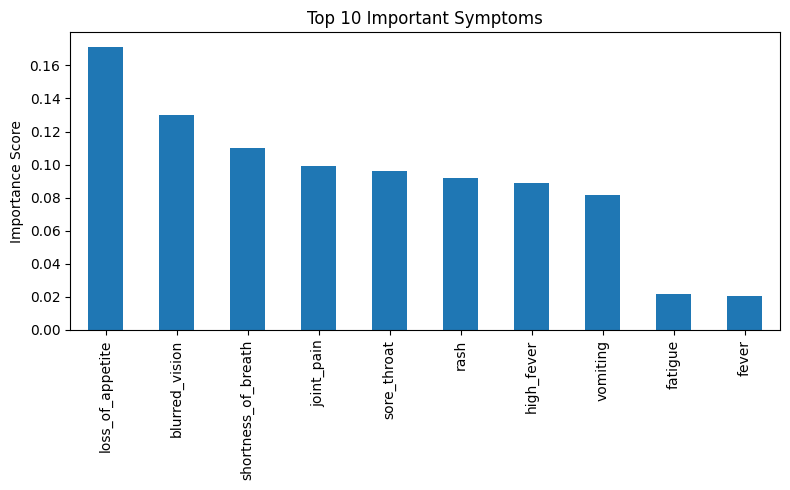

In [29]:
#EXPLAINABILITY – FEATURE IMPORTANCE

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

plt.figure(figsize=(8,5))
feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 Important Symptoms")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [30]:
#FINAL EVALUATION

y_pred = rf.predict(X_test)

print("\nFINAL MODEL PERFORMANCE:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


FINAL MODEL PERFORMANCE:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        64
           3       1.00      1.00      1.00        71
           4       1.00      1.00      1.00        65
           5       1.00      1.00      1.00        66

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



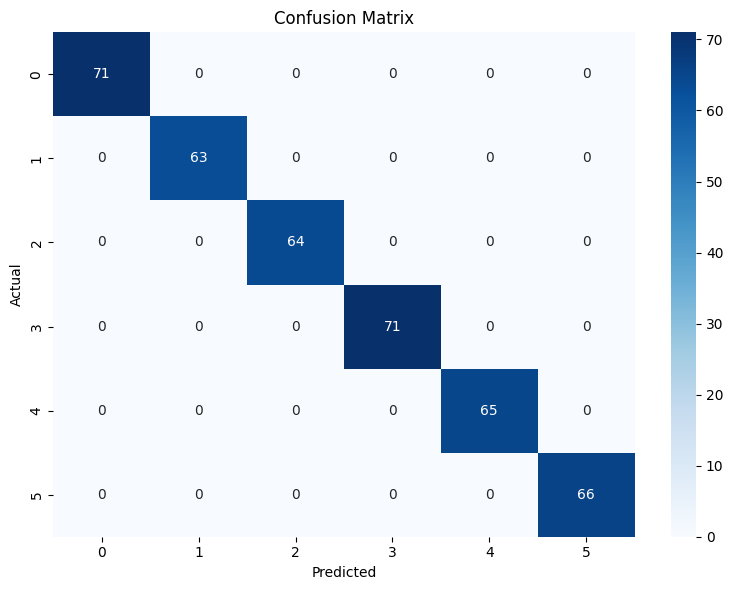

In [31]:
#ERROR ANALYSIS – CONFUSION MATRIX

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()